In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

$X_1, \dots, X_n \sim U \left[0 , \theta_0 \right]$ \\
$\hat{\theta}_n = \text{max} X_i$
# Исследование скорости сходимости
Сходимость по вероятности:
$$\forall \varepsilon: P \left( \left|\hat{\theta}_n - \theta_0 \right| > \varepsilon \right) \to 0, n \to \infty$$
Теоретическая зависимость:
$$ P \left(\left| \theta - X_{max} \right| \geq \varepsilon \right) = P \left( X_{max} \leq \theta - \varepsilon \right) = F_{X_{max}} \left( \theta - \varepsilon \right) = $$
$$ =  \left( \frac{\theta - \varepsilon }{\theta} \right)^n = \left(1 -
\frac{\varepsilon}{\theta} \right)^n$$

In [21]:
def probability_calculator(theta_0 = 1, n= 100, n_samples = int(1e4), epsilon = 1e-3): # Здесь n - это n из формулы, n_samples - число случаев, по которым считается вероятность
    probability = 0
    samples = np.random.uniform(0,theta_0, size = (n_samples, n))
    theta_n = np.max(samples, axis = 1)
    P = np.abs(theta_n - theta_0)
    return len(P[P > epsilon]) / n_samples

def estimation(n, theta_0, epsilon = 0.001):
    return (1 - epsilon/theta_0)**n



In [22]:
epsilon = [1E-3, 1E-4]
theta_0 = [1,2]
n = np.arange(1,10000,500)
P = np.zeros((len(theta_0),len(epsilon),len(n)))
for i in range(len(theta_0)):
    for j in range(len(epsilon)):
        for k in range(len(n)):
            P[i,j,k] = probability_calculator(theta_0[i], n[k], epsilon = epsilon[j])

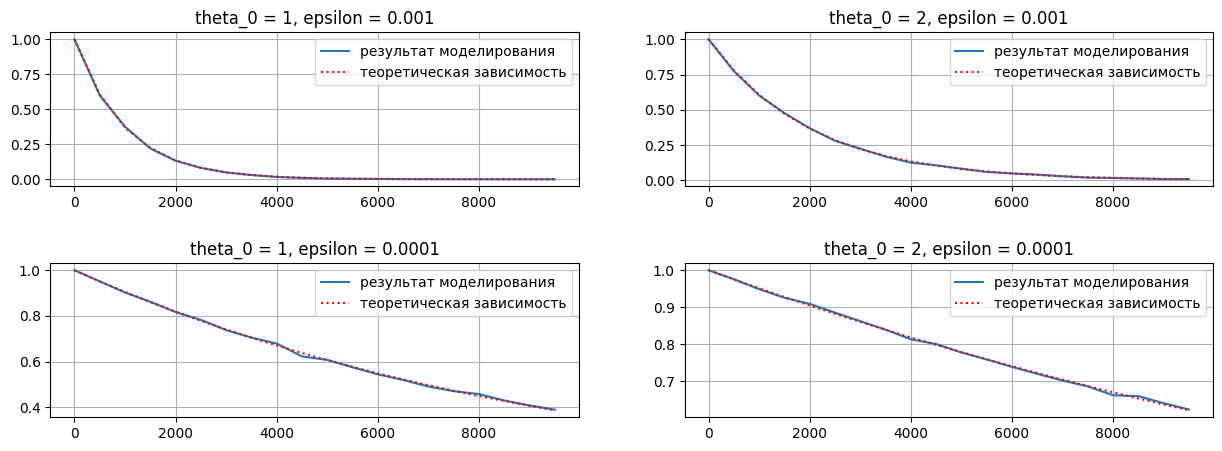

In [23]:
n = np.arange(1,10000,500)
fig, ax = plt.subplots(len(epsilon),len(theta_0),figsize = (15,5))
for i in range(len(epsilon)):
    for j in range(len(theta_0)):
        ax[i,j].plot(n, P[j,i],label = 'результат моделирования')
        ax[i,j].plot(n,estimation(n,theta_0[j],epsilon = epsilon[i]),'r:',label = 'теоретическая зависимость')
        ax[i,j].set_title('theta_0 = {}, epsilon = {}'.format(theta_0[j],epsilon[i]))
        ax[i,j].legend()
        ax[i,j].grid()
plt.subplots_adjust(hspace = 0.5)
plt.show()

# Исследование асимптотической несмещенности оценки
Асимтотическая несмещенность оценки означает, что: $$E \hat{\theta}_n \to \theta_0, n \to \infty$$
Будем действовать аналогично, моделируем $E \hat{\theta}_n$ и показывать, что оно сходится к $\theta_0$. Если быть точнее, то будем смотреть на зависимость относительной ошибки $$\frac{\left|E \hat{\theta}_n - \theta_0 \right|}{\theta_0}$$
от $n$.
Теоретическая зависимость для данной величины:
$$F_{X_{max}} (x) = \frac{x^n}{\theta_0^n}$$
$$p_{X_{max}}(x) = n \frac{x^{n-1}}{\theta_0^n}$$
$$E X_{max} = \int_0^{\theta_0} x n \frac{x^{n-1}}{\theta_0^n} d x = \frac{n}{n + 1} \theta_0$$
$$\frac{\left|E X_{max} - \theta_0 \right|}{\theta_0} = \frac{1}{n+1}$$

In [24]:
def mean_calculator(theta_0 = 1, n = 100, n_samples = int(1E4)):
    samples = np.random.uniform(0,theta_0,size = (n_samples,n))
    theta_n = np.max(samples,axis = 1)
    return abs(np.mean(theta_n) - theta_0) / theta_0
def mean_theory(n):
    return 1/(1+n)

In [25]:
n = np.arange(1,200)
n_samples = int(1e4)
theta_0 = [10]
M = np.zeros((len(theta_0),len(n)))
for i in range(len(theta_0)):
    for j in range(len(n)):
      M[i,j] = mean_calculator(theta_0[i], n[j])

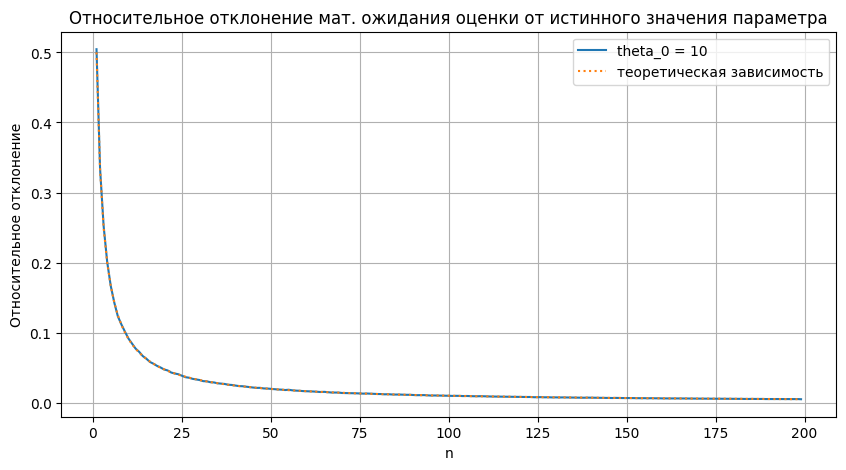

In [26]:
fig = plt.figure(figsize = (10,5))
for i in range(len(theta_0)):
  plt.plot(n,M[i],label = 'theta_0 = {}'.format(theta_0[i]) )
plt.plot(n,mean_theory(n),':', label = 'теоретическая зависимость')
plt.xlabel('n')
plt.ylabel('Относительное отклонение')
plt.title('Относительное отклонение мат. ожидания оценки от истинного значения параметра')
plt.grid()
plt.legend()
plt.show()

Полученная зависимость согласуется с теорией. Она убывает при $n \to \infty$, значит оценка асимптотически несмещенная